In [1]:
import sys
import os

import argparse
import requests
from pprint import pprint
import numpy as np

sys.path.append("../")
import predictlol as pl
import config

import json
# from pymongo import MongoClient
import time
import os, sys, errno

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

api_key = config.api_key

username = 'delphinus6'
region = 'na1'
# match_index = 0

summoner_name, summoner_id, account_id = pl.get_summoner_ids(username, api_key, region)
print(summoner_name, summoner_id, account_id)

delphinus6 78751242 234507298


In [2]:
with open('delphinus6_ranked_solos.json', 'r') as fn:
    ranked_solos = json.load(fn)
last_game = ranked_solos[0]

In [3]:
player_histories = []
for participant in last_game['participantIdentities']:
    with open('../data/420/%s.json' % participant['player']['accountId'], 'r') as fn:
        player_histories.append(json.load(fn))

In [43]:
last_game['participantIdentities'][5]

{'participantId': 6,
 'player': {'platformId': 'NA1',
  'accountId': 229430607,
  'summonerName': 'TheNanoPride',
  'summonerId': 68930646,
  'currentPlatformId': 'NA1',
  'currentAccountId': 229430607,
  'matchHistoryUri': '/v1/stats/player_history/NA1/229430607',
  'profileIcon': 3551}}

In [4]:
len(player_histories)

10

In [5]:
for history in player_histories:
    print(len(history))

65
100
100
100
100
100
100
120
100
100


In [ ]:
for history in player_histories:
    print(len(history))

In [5]:
player_histories[0][0]['stats']

{'participantId': 6,
 'win': True,
 'item0': 3031,
 'item1': 3095,
 'item2': 3006,
 'item3': 3026,
 'item4': 3094,
 'item5': 1053,
 'item6': 3340,
 'kills': 11,
 'deaths': 11,
 'assists': 21,
 'largestKillingSpree': 4,
 'largestMultiKill': 2,
 'killingSprees': 3,
 'longestTimeSpentLiving': 454,
 'doubleKills': 2,
 'tripleKills': 0,
 'quadraKills': 0,
 'pentaKills': 0,
 'unrealKills': 0,
 'totalDamageDealt': 209634,
 'magicDamageDealt': 39727,
 'physicalDamageDealt': 161140,
 'trueDamageDealt': 8766,
 'largestCriticalStrike': 837,
 'totalDamageDealtToChampions': 50178,
 'magicDamageDealtToChampions': 5726,
 'physicalDamageDealtToChampions': 38128,
 'trueDamageDealtToChampions': 6323,
 'totalHeal': 10890,
 'totalUnitsHealed': 1,
 'damageSelfMitigated': 18428,
 'damageDealtToObjectives': 23235,
 'damageDealtToTurrets': 7849,
 'visionScore': 36,
 'timeCCingOthers': 8,
 'totalDamageTaken': 38651,
 'magicalDamageTaken': 27055,
 'physicalDamageTaken': 9140,
 'trueDamageTaken': 2455,
 'goldEar

In [8]:
list(player_histories[0][0].keys())

['gameId',
 'platformId',
 'gameCreation',
 'gameDuration',
 'queueId',
 'mapId',
 'seasonId',
 'gameVersion',
 'gameMode',
 'gameType',
 'teams',
 'participants',
 'participantIdentities',
 'champion',
 'queue',
 'season',
 'timestamp',
 'role',
 'lane',
 'participantId',
 'teamId',
 'championId',
 'spell1Id',
 'spell2Id',
 'highestAchievedSeasonTier',
 'stats',
 'timeline']

In [13]:
list(player_histories[0][0]['participants'][0].keys())

['participantId',
 'teamId',
 'championId',
 'spell1Id',
 'spell2Id',
 'highestAchievedSeasonTier',
 'stats',
 'timeline']

In [14]:
list(player_histories[0][0]['participantIdentities'][0].keys())

['participantId', 'player']

In [15]:
player_histories[0][0]['participantIdentities'][0]

{'participantId': 1,
 'player': {'platformId': 'NA1',
  'accountId': 240299893,
  'summonerName': 'TheRheumRoom',
  'summonerId': 89049160,
  'currentPlatformId': 'NA1',
  'currentAccountId': 240299893,
  'matchHistoryUri': '/v1/stats/player_history/NA1/240299893',
  'profileIcon': 1640}}

In [16]:
def search_dict_list(dictlist, keys, value):
    # dictlist is a list of dicts
    # keys is a list of strings (in order)
    # value is the value to check against
    if type(keys) is not list:
        if type(keys) is str:
            keys = [keys]
        else:
            sys.exit('Enter valid keys -- string or list!')
    
    matched_dicts = []
    for i, dictionary in enumerate(dictlist):
        dict_value = dictionary.copy()
        try:
            for key in keys:
                dict_value = dict_value[key]
        except Exception as e:
            pass
        if dict_value == value:
            matched_dicts.append(dictionary)
    return matched_dicts

In [37]:
player1_history = player_histories[0]
game_index = 0
search_dict_list(player1_history[game_index]['participantIdentities'], 
                 ['participantId'], 
                 player1_history[game_index]['participantId'])[0]

{'participantId': 6,
 'player': {'platformId': 'NA1',
  'accountId': 200333018,
  'summonerName': 'Zeriya',
  'summonerId': 37244963,
  'currentPlatformId': 'NA1',
  'currentAccountId': 200333018,
  'matchHistoryUri': '/v1/stats/player_history/NA1/200333018',
  'profileIcon': 940}}

In [32]:
player1_history = player_histories[0]
game_index = 0
search_dict_list(player1_history[game_index]['participantIdentities'], 
                 ['participantId'], 
                 player1_history[game_index]['participantId'])[0]['player']['summonerName']

'Zeriya'

In [42]:
player_rates = []
for index, player_history in enumerate(player_histories):
    participant_id = player_history[0]['participantId']
    summoner_name = last_game['participantIdentities'][index]['player']['summonerName']
    
    rates = []
    for game in player_history:
        my_rate = game['stats']['goldEarned'] / game['gameDuration']
        rates.append(my_rate)
    average_rate = np.mean(rates, axis=0)
    
    player_rates.append([summoner_name, average_rate])
pprint(player_rates)

[['Zeriya', 5.967481084220859],
 ['ChiefAkeem7', 6.32220721035431],
 ['Why Main Lee SIn', 6.449623375487156],
 ['YoiTzTyler', 4.547985918881085],
 ['XxF3ARD3ATHxX', 5.94132079596319],
 ['TheNanoPride', 6.022032153579414],
 ['SylowP', 5.645336832372258],
 ['delphinus6', 6.776633317401153],
 ['Girahim', 6.673916769097632],
 ['Master Kouta', 5.488785202251783]]


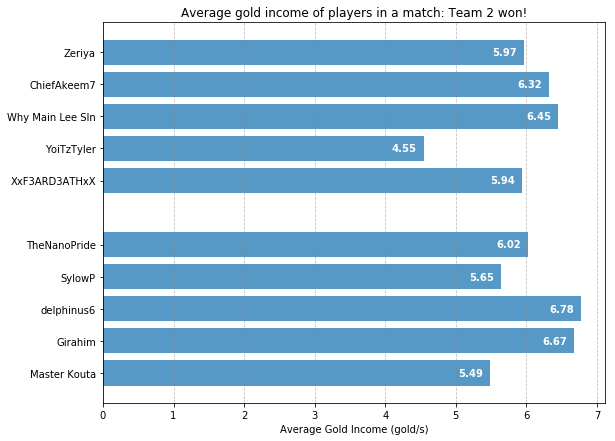

In [87]:
names = [x[0] for x in player_rates]
y_pos = np.arange(len(names))[::-1]
for i in range(int(len(y_pos) / 2)):
    y_pos[i] += 1

rates = [x[1] for x in player_rates]

fig = plt.figure(figsize=(9, 7))

rects = plt.barh(y_pos, rates, align='center', alpha=0.75)
plt.yticks(y_pos, names)
plt.xlabel('Average Gold Income (gold/s)')

if last_game['teams'][0]['win'] == 'Win':
    team_num = 1
else:
    team_num = 2
plt.title('Average gold income of players in a match: Team %s won!' % team_num)

ax = plt.gca()
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.5)
# ax.axvline(3.5, color='grey', alpha=0.25)

for rect in rects:
    width = rect.get_width()
    width_str = '%.02f' % width
    
    xloc = width - 0.1
    yloc = rect.get_y() + rect.get_height() / 2.0
    
    ax.text(xloc, yloc, width_str, horizontalalignment='right',
                     verticalalignment='center', color='white', weight='bold',
                     clip_on=True)
    
plt.show()

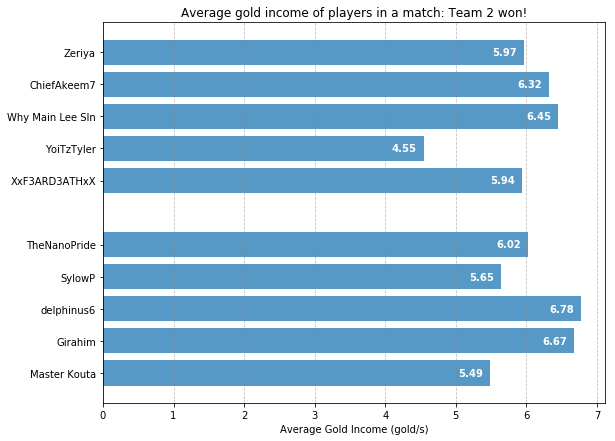

Sum for Team 1: 29.2286183849066
Sum for Team 2: 30.60670427470224


In [123]:
game_index = 0
this_game = ranked_solos[game_index]

# Get whole histories
player_histories = []
for participant in this_game['participantIdentities']:
    with open('../data/420/%s.json' % participant['player']['accountId'], 'r') as fn:
        player_histories.append(json.load(fn))

# Calculate the average rates
player_rates = []
for index, player_history in enumerate(player_histories):
    participant_id = player_history[0]['participantId']
    summoner_name = this_game['participantIdentities'][index]['player']['summonerName']
    
    rates = []
    for game in player_history:
        my_rate = game['stats']['goldEarned'] / game['gameDuration']
        rates.append(my_rate)
    average_rate = np.mean(rates, axis=0)
    
    player_rates.append([summoner_name, average_rate])

# Make bar plot of the average rate
names = [x[0] for x in player_rates]
y_pos = np.arange(len(names))[::-1]
for i in range(int(len(y_pos) / 2)):
    y_pos[i] += 1

rates = [x[1] for x in player_rates]

fig = plt.figure(figsize=(9, 7))

rects = plt.barh(y_pos, rates, align='center', alpha=0.75)
plt.yticks(y_pos, names)
plt.xlabel('Average Gold Income (gold/s)')

if this_game['teams'][0]['win'] == 'Win':
    team_num = 1
else:
    team_num = 2
plt.title('Average gold income of players in a match: Team %s won!' % team_num)

ax = plt.gca()
ax.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.5)
# ax.axvline(3.5, color='grey', alpha=0.25)

for rect in rects:
    width = rect.get_width()
    width_str = '%.02f' % width
    
    xloc = width - 0.1
    yloc = rect.get_y() + rect.get_height() / 2.0
    
    ax.text(xloc, yloc, width_str, horizontalalignment='right',
                     verticalalignment='center', color='white', weight='bold',
                     clip_on=True)
    
plt.show()

print('Sum for Team 1: %s' % sum([x[1] for x in player_rates[:5]]))
print('Sum for Team 2: %s' % sum([x[1] for x in player_rates[5:]]))

In [84]:
last_game['teams'][1]['win']

'Win'

In [23]:
player1_history[game_index]['participants']

[{'participantId': 1,
  'teamId': 100,
  'championId': 31,
  'spell1Id': 11,
  'spell2Id': 4,
  'highestAchievedSeasonTier': 'UNRANKED',
  'stats': {'participantId': 1,
   'win': False,
   'item0': 3193,
   'item1': 3143,
   'item2': 3047,
   'item3': 3110,
   'item4': 1413,
   'item5': 3075,
   'item6': 3363,
   'kills': 19,
   'deaths': 13,
   'assists': 10,
   'largestKillingSpree': 2,
   'largestMultiKill': 1,
   'killingSprees': 5,
   'longestTimeSpentLiving': 497,
   'doubleKills': 0,
   'tripleKills': 0,
   'quadraKills': 0,
   'pentaKills': 0,
   'unrealKills': 0,
   'totalDamageDealt': 213485,
   'magicDamageDealt': 147490,
   'physicalDamageDealt': 37983,
   'trueDamageDealt': 28011,
   'largestCriticalStrike': 39,
   'totalDamageDealtToChampions': 36600,
   'magicDamageDealtToChampions': 19782,
   'physicalDamageDealtToChampions': 3706,
   'trueDamageDealtToChampions': 13112,
   'totalHeal': 14720,
   'totalUnitsHealed': 1,
   'damageSelfMitigated': 78443,
   'damageDealtToO